In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
ntypes = ['ff', 'res']
nrnns = [1000]
stochlearns = [False, True]
nonlinearities = ['relu', 'phia', 'tanh']
seeds = 30
ncues = 200
glr = 1e-4
fig_dir = './figs/'
os.makedirs(fig_dir, exist_ok=True)

prefix = '251225'
data_dir = f'/n/netscratch/pehlevan_lab/Lab/mgk/schema/assoc_{prefix}'

errs = np.zeros([len(ntypes), len(nrnns), len(stochlearns), len(nonlinearities), seeds, ncues])

for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            for nl, nonlinearity in enumerate(nonlinearities):
                for seed in range(seeds):

                    if ntype == 'ff':
                        exptname = f'ff_{nrnn}N_{nonlinearity}_{seed}s_{stochlearn}sl_{glr}glr'
                    else:
                        exptname = f'res_{nrnn}N_{nonlinearity}_{seed}s_{stochlearn}sl_{glr}glr'

                    try: 
                        filename = f'{data_dir}/{exptname}.npz'
                        data = np.load(filename)
                        errs[nt, nn, sl, nl, seed, :] = data['errerr'][1]
                    except FileNotFoundError:
                        print(f'File not found: {filename}')
                        errs[nt, nn, sl, nl, seed, :] = np.nan

In [22]:
# # plot influence of nrnns
# f,axs = plt.subplots(1,len(nrnns), figsize=(4*len(nrnns),3), sharey=True)

# for nn, nrnn in enumerate(nrnns):
#     ax = axs[nn]
#     for nt, ntype in enumerate(ntypes):
#         for sl, stochlearn in enumerate(stochlearns):
#             for nl, nonlinearity in enumerate(nonlinearities):
#                 label = f'{ntype}, {nonlinearity}, {"EH" if stochlearn else "LMS"}'
#                 ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
#     ax.set_title(f'N={nrnn}')
#     ax.set_xlabel('Number of cues')
#     if nn == 0:
#         ax.set_ylabel('Recall MSE')
#     ax.legend(fontsize=6)
# f.tight_layout()
# f.savefig(f'{fig_dir}/combined_nrnns.png')

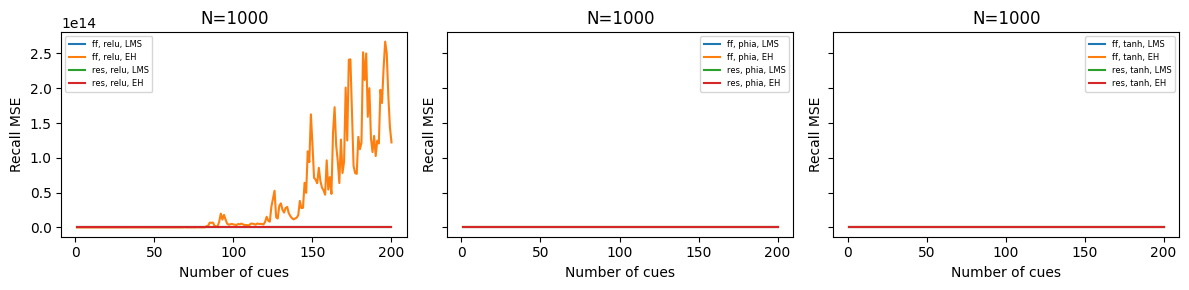

In [23]:
# plot influence of nonlinearity
f,axs = plt.subplots(1,len(nonlinearities), figsize=(4*len(nonlinearities),3), sharey=True)

for nl, nonlinearity in enumerate(nonlinearities):
    ax = axs[nl]
    for nt, ntype in enumerate(ntypes):
        for sl, stochlearn in enumerate(stochlearns):
            label = f'{ntype}, {nonlinearity}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
    ax.set_title(f'N={nrnn}')
    ax.set_xlabel('Number of cues')
    if nn == 0:
        ax.set_ylabel('Recall MSE')
    ax.legend(fontsize=6)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_nonlinear.png')

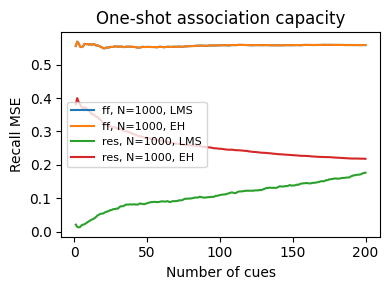

In [24]:
# plot only specific combination
# 1. FF, 256 N, phia, EH
# 2. FF, 256 N, phia, LMS
# 3. Res, 256 N, phia, EH
# 4. Res, 256 N, phia, LMS
# 5. FF, 1024 N, phia, EH
# 6. FF, 1024 N, phia, LMS
# 7. Res, 1024 N, phia, EH
# 8. Res, 1024 N, phia, LMS

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('phia')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_phia.png')


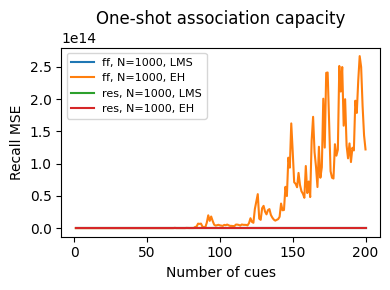

In [25]:
# plot only specific combination

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('relu')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_relu.png')


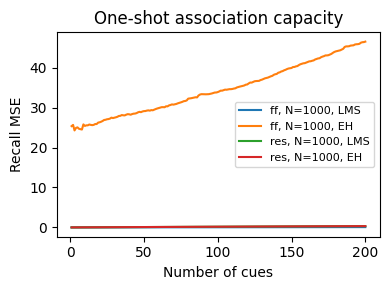

In [26]:
# plot only specific combination

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('tanh')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_tanh.png')
